In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# 1. Load Display and Save image#

width: 600 pixels
height: 450  pixels
channels: 3


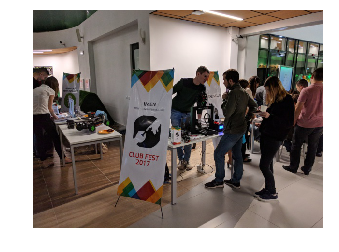

In [2]:
# load the image and show some basic information on it
# cv2 reads as BGR image, matplotlib.image as RGB image

origImg = # TODO: Read an image

print("width: {w} pixels".format(w=origImg.shape[1]))
print("height: {h}  pixels".format(h=origImg.shape[0]))
print("channels: {c}".format(c=origImg.shape[2]))

# remove numbered axes
plt.axis("off")
# show the image
plt.imshow(origImg);

# save the image -- OpenCV handles converting filetypes
# automatically. ; - for disabling result output
cv2.imwrite("img/newimage.jpg", cv2.cvtColor(origImg, cv2.COLOR_RGB2BGR));

### Convert to grayscale ###

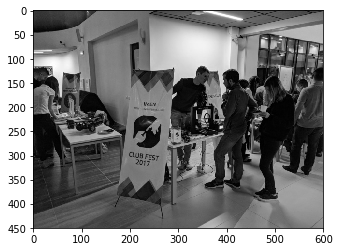

In [4]:
grayImg = # TODO: Convert to grayscale
plt.imshow(grayImg, cmap='gray');

# 2. Rotation #

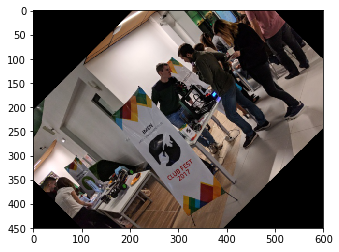

In [5]:
# grab the dimensions of the image and calculate the center of the image
(h, w) = origImg.shape[:2]
(cX, cY) = (w / 2, h / 2)

# rotate our image by 45 degrees
M = # TODO: Make 45º rotation matrix
rotated = # TODO: Rotate the image
plt.imshow(rotated);

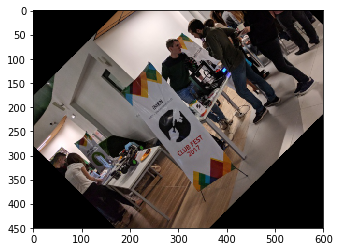

In [6]:
# rotate our image around an arbitrary point rather than the center
M = # TODO: Make rotation matrix
rotated = # TODO: Rotate the image
plt.imshow(rotated);

### Using imutils library it is much easier! ###

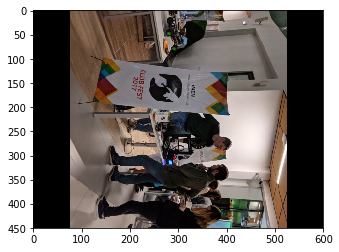

In [7]:
# finally, let's use our helper function in imutils to rotate the image by
# -90 degrees
import imutils

rotated = # TODO: rotate using imutils
plt.imshow(rotated);

# 3. Resizing #

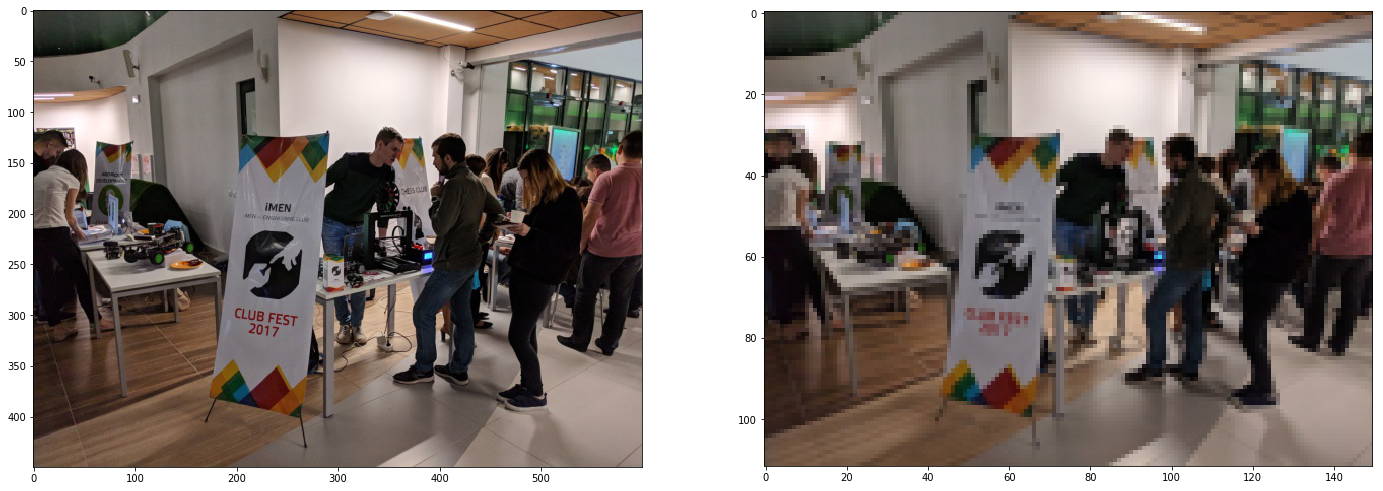

In [8]:
f, plts = plt.subplots(1, 2, figsize=(24, 20))
plts[0].imshow(origImg)

# we need to keep in mind aspect ratio so the image does not look skewed
# or distorted -- therefore, we calculate the ratio of the new image to
# the old image. Let's make our new image have a width of 150 pixels
r = 150.0 / origImg.shape[1]
dim = (150, int(origImg.shape[0] * r))

# perform the actual resizing (downsampling) of the image
resized = # TODO: Resize the image
plts[1].imshow(resized);

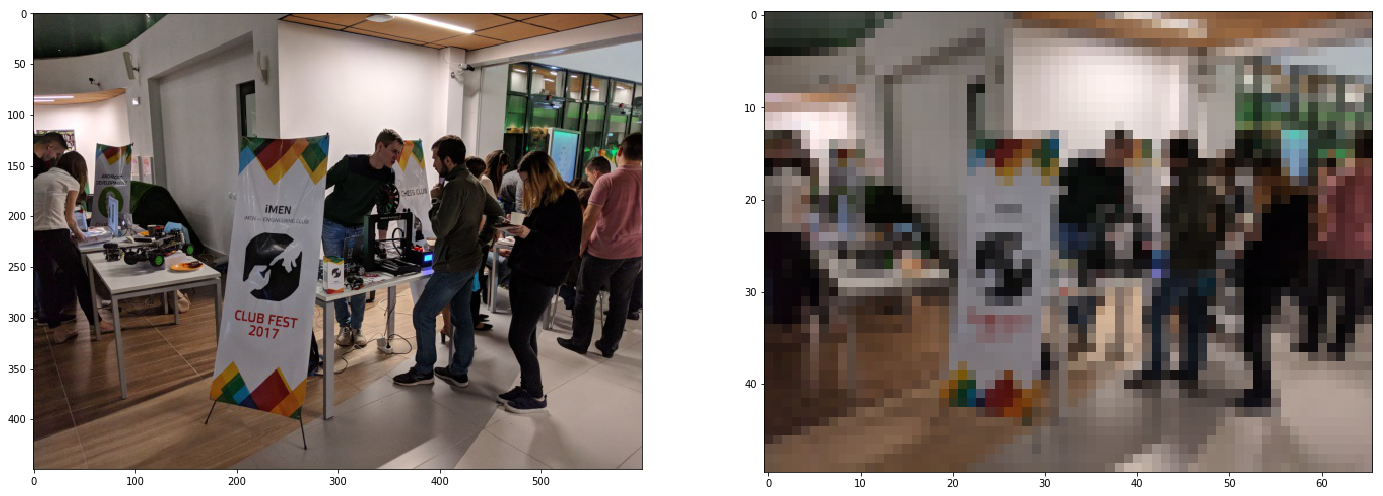

In [9]:
f, plts = plt.subplots(1, 2, figsize=(24, 20))
plts[0].imshow(origImg)

# what if we wanted to adjust the height of the image? -- we can apply
# the same concept, again keeping in mind the aspect ratio, but instead
# calculating the ratio based on height -- let's make the height of the
# resized image 50 pixels
r = 50.0 / origImg.shape[0]
dim = (int(origImg.shape[1] * r), 50)

# perform the resizing
resized = # TODO: Resize the image
plts[1].imshow(resized);

In [10]:
scale = 600/origImg.shape[1]
resized = # TODO: Resize using the scale
cv2.imwrite("img/newimage.jpg", cv2.cvtColor(resized, cv2.COLOR_RGB2BGR));

### Again, using imutils library it is much easier! ###

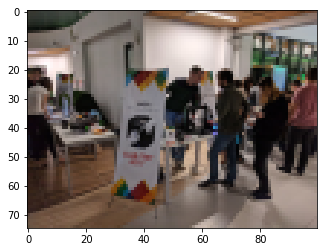

In [11]:
# of course, calculating the ratio each and every time we want to resize
# an image is a real pain -- let's create a  function where we can specify
# our target width or height, and have it take care of the rest for us.
resized = # TODO: Resize using imutils
plt.imshow(resized);

### Upsampling ###

In [12]:
# construct the list of interpolation methods
methods = [
    ("cv2.INTER_NEAREST", cv2.INTER_NEAREST),
    ("cv2.INTER_LINEAR", cv2.INTER_LINEAR),
    ("cv2.INTER_AREA", cv2.INTER_AREA),
    ("cv2.INTER_CUBIC", cv2.INTER_CUBIC),
    ("cv2.INTER_LANCZOS4", cv2.INTER_LANCZOS4)]

# loop over the interpolation methods
for (name, method) in methods:
    # increase the size of the image by 3x using the current interpolation
    # method
    resized = # TODO: resize using different methods of interpolation
    cv2.imshow("Method: {}".format(name), imutils.opencv2matplotlib(resized))
    cv2.waitKey(0)
cv2.destroyAllWindows()
%matplotlib inline

# 4. Cropping #

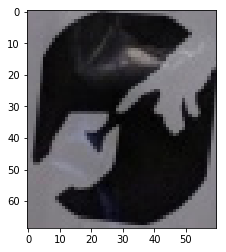

In [13]:
# cropping an image is accomplished using simple NumPy array slices --
# let's crop the logo from the image
logo = # TODO: slice the image
plt.imshow(logo);

# 5. Flipping #

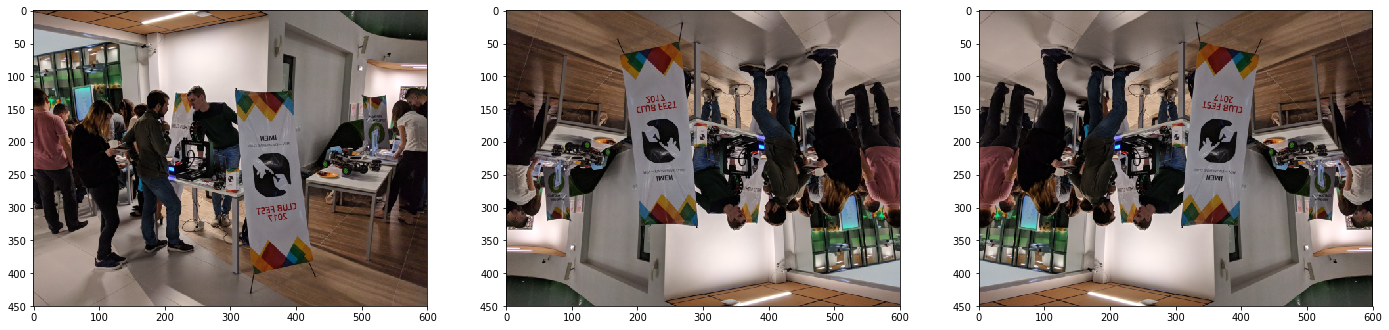

In [14]:
f, plts = plt.subplots(1, 3, figsize=(24, 20))

# flip the image horizontally
flipped = # TODO: flip the image horizontally
plts[0].imshow(flipped)

# flip the image vertically
flipped = # TODO: flip the image vertically
plts[1].imshow(flipped)

# flip the image along both axes
flipped = # TODO: flip the image along both axes
plts[2].imshow(flipped);

# 6. Masking #

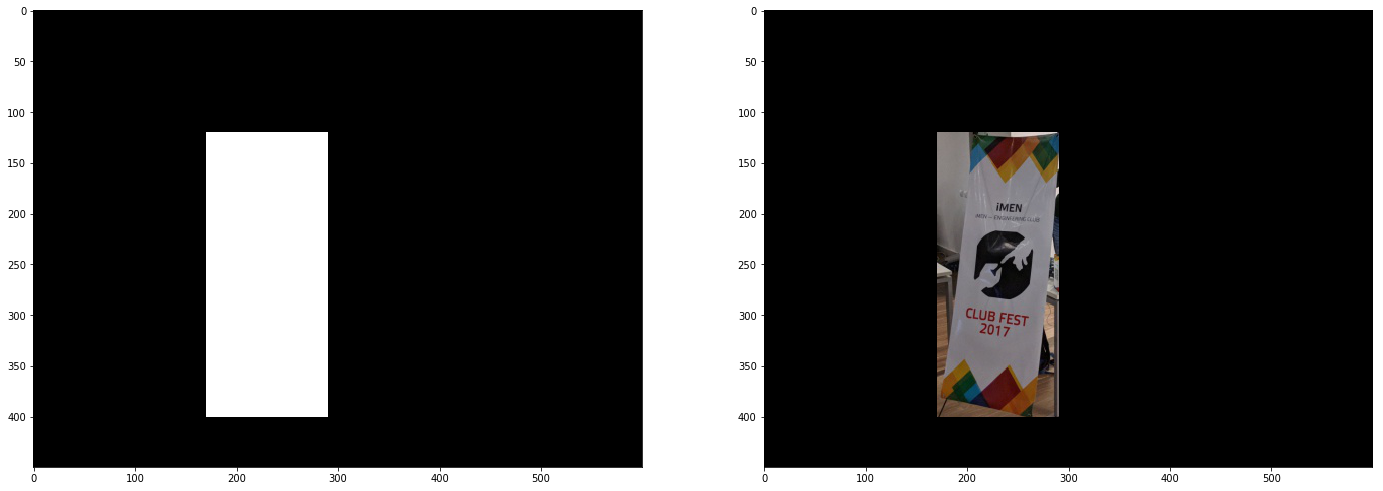

In [15]:
f, plts = plt.subplots(1, 2, figsize=(24, 20))

# Masking allows us to focus only on parts of an image that interest us.
# A mask is the same size as our image, but has only two pixel values,
# 0 and 255. Pixels with a value of 0 are ignored in the orignal image,
# and mask pixels with a value of 255 are allowed to be kept. For example,
# let's construct a rectangular mask that displays only the banner in
# the image
mask = np.zeros(origImg.shape[:2], dtype="uint8")
cv2.rectangle(mask, (170, 120), (290, 400), 255, -1)
plts[0].imshow(mask, cmap='gray');

# Apply out mask -- notice how only the banner in the image is cropped out
masked = # TODO: Apply the mask
plts[1].imshow(masked);

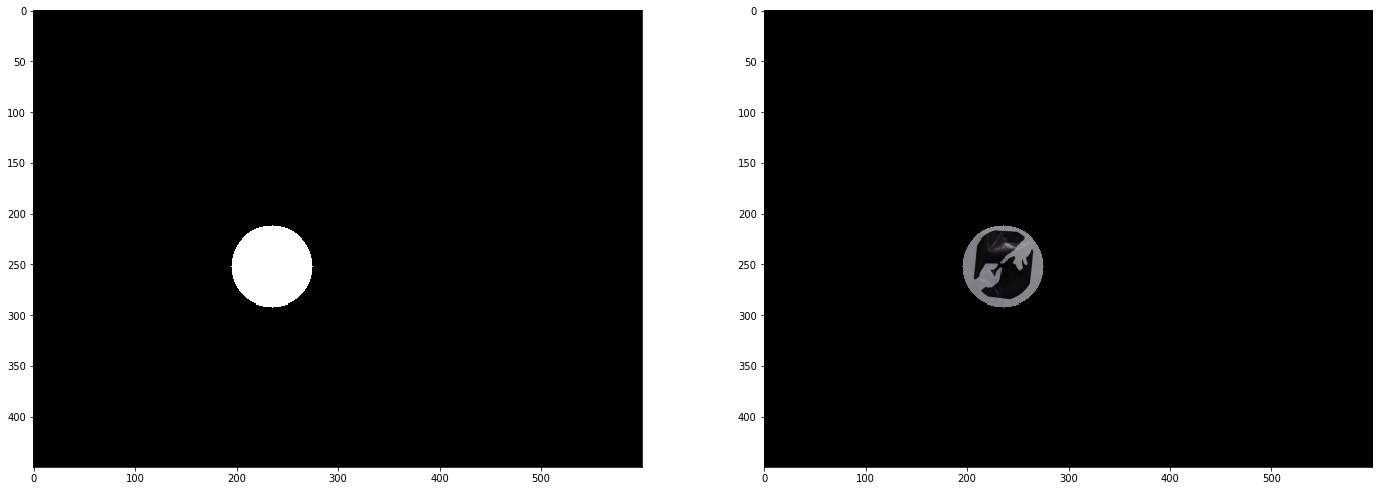

In [16]:
f, plts = plt.subplots(1, 2, figsize=(24, 20))

# Now, let's make a circular mask with a radius of 100 pixels and apply the
# mask again
mask = np.zeros(origImg.shape[:2], dtype="uint8")
cv2.circle(mask, (235, 252), 40, 255, -1)

masked = # TODO: Apply the mask
plts[0].imshow(mask, cmap='gray')
plts[1].imshow(masked);

# 7. Drawing #

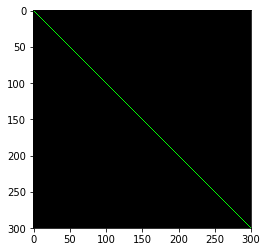

In [17]:
# initialize our canvas as a 300x300 with 3 channels, Red, Green,
# and Blue, with a black background
canvas = np.zeros((300, 300, 3), dtype="uint8")

# draw a green line from the top-left corner of our canvas to the
# bottom-right
green = (0, 255, 0)
# TODO: draw the green line
plt.imshow(canvas);

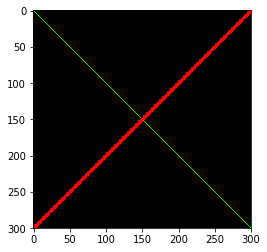

In [18]:
# now, draw a 3 pixel thick red line from the top-right corner to the
# bottom-left
red = (0, 0, 255)
# TODO: Draw the line
plt.imshow(canvas);

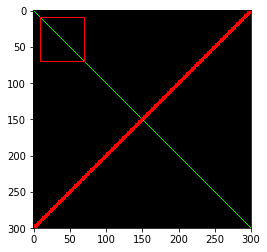

In [19]:
# draw a green 60x60 pixel square, starting at 10x10 and ending at 70x70
# TODO: Draw the rectangle
plt.imshow(canvas);

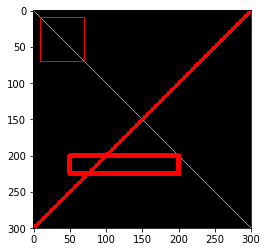

In [20]:
# draw another rectangle, this time we'll make it red and 5 pixels thick
# TODO: Draw the rectangle
plt.imshow(canvas);

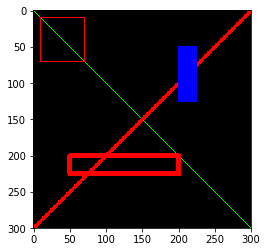

In [21]:
# let's draw one last rectangle: blue and filled in
blue = (255, 0, 0)
# TODO: Draw the rectangle
plt.imshow(canvas);

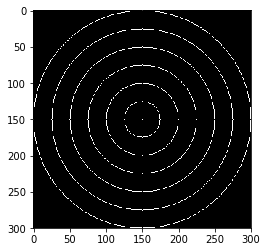

In [22]:
# reset our canvas and draw a white circle at the center of the canvas with
# increasing radii - from 25 pixels to 150 pixels
canvas = np.zeros((300, 300, 3), dtype="uint8")
(centerX, centerY) = (canvas.shape[1] // 2, canvas.shape[0] // 2)
white = (255, 255, 255)

for r in range(0, 175, 25):
    # TODO: Draw the circle

# show our work of art
plt.imshow(canvas);

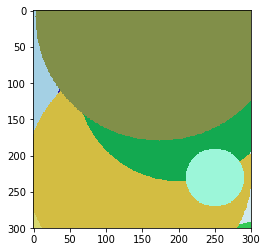

In [23]:
# let's go crazy and draw 25 random circles
for i in range(0, 25):
    # randomly generate a radius size between 5 and 200, generate a random
    # color, and then pick a random point on our canvas where the circle
    # will be drawn
    radius = np.random.randint(5, high=200)
    color = np.random.randint(0, high=256, size = (3,)).tolist()
    pt = np.random.randint(0, high=300, size = (2,))

    # draw our random circle
    # TODO: draw the circle

# Show our masterpiece
plt.imshow(canvas);

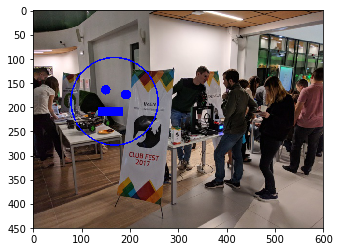

In [24]:
# load the image of somebody's face
image = origImg.copy()

# draw a circle around my face, two filled in circles covering the eyes, and
# a rectangle surrounding the mouth
# TODO: draw rectangles

# show the output image
plt.imshow(image);

# 8. Split and merge #

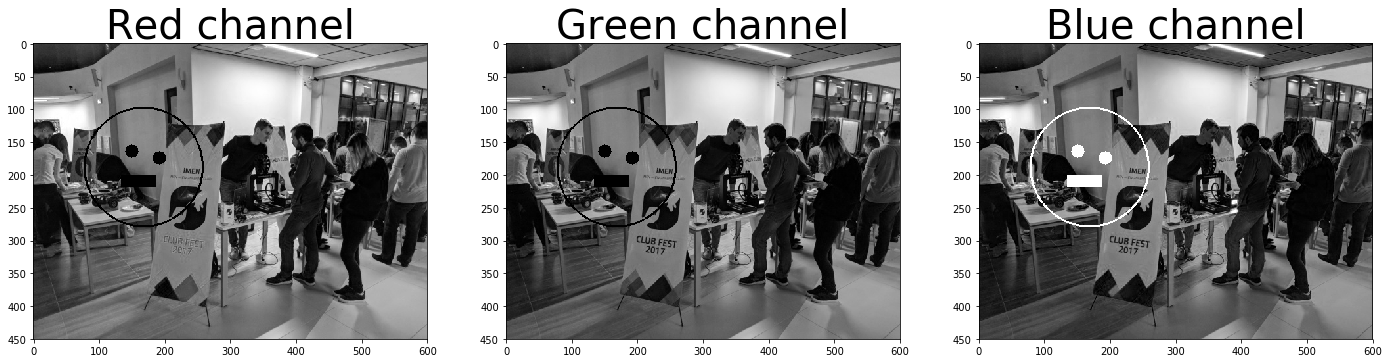

In [25]:
f, plts = plt.subplots(1, 3, figsize=(24, 6))

# Grab each channel: Red, Green, and Blue.
(R, G, B) = # TODO: split the image on 3 channels

plts[0].imshow(R, cmap='gray'), plts[0].set_title("Red channel", fontsize=40);
plts[1].imshow(G, cmap='gray'), plts[1].set_title("Green channel", fontsize=40);
plts[2].imshow(B, cmap='gray'), plts[2].set_title("Blue channel", fontsize=40);

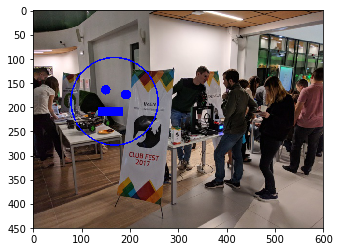

In [26]:
# merge the image back together again
merged = # TODO: merge them back again
plt.imshow(merged);

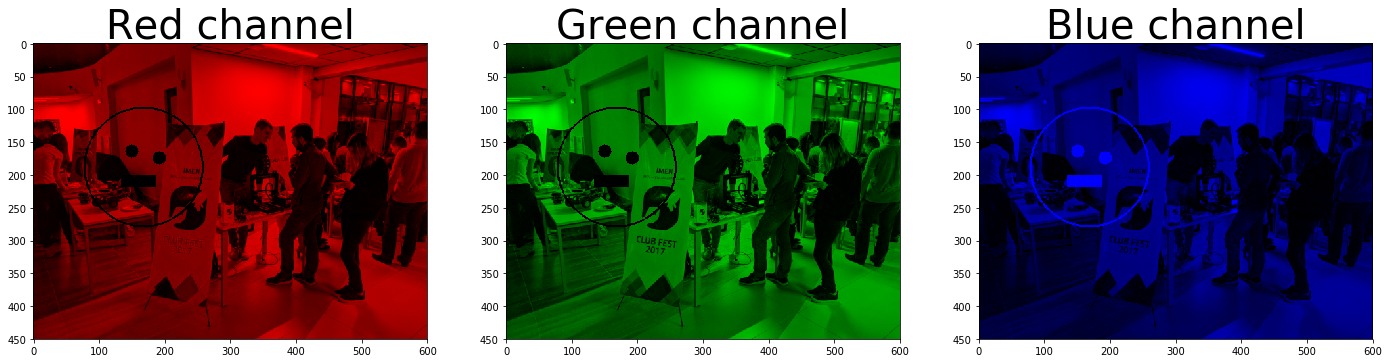

In [27]:
f, plts = plt.subplots(1, 3, figsize=(24, 6))

# visualize each channel in color
zeros = np.zeros(image.shape[:2], dtype = "uint8")
plts[0].imshow(# TODO: Merge red), plts[0].set_title("Red channel", fontsize=40);
plts[1].imshow(# TODO: Merge green), plts[1].set_title("Green channel", fontsize=40);
plts[2].imshow(# TODO: Merge blue), plts[2].set_title("Blue channel", fontsize=40);

# 9. Translation #

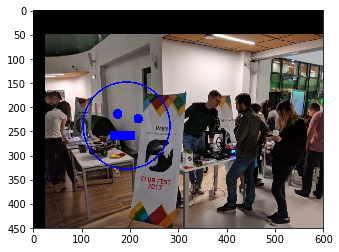

In [28]:
# NOTE: Translating (shifting) an image is given by a NumPy matrix in
# the form:
#          [[1, 0, shiftX], 
#           [0, 1, shiftY]]
# You simply need to specify how many pixels you want to shift the image
# in the X and Y direction -- let's translate the image 25 pixels to the
# right and 50 pixels down
M = np.float32([[1, 0, 25], [0, 1, 50]])
shifted = # TODO: Translate the image
plt.imshow(shifted);

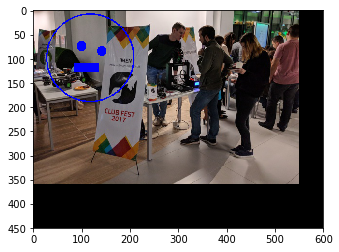

In [29]:
# now, let's shift the image 50 pixels to the left and 90 pixels up, we
# accomplish this using negative values
M = # TODO: Make the translation matrix
shifted = # TODO: Translate the image
plt.imshow(shifted);

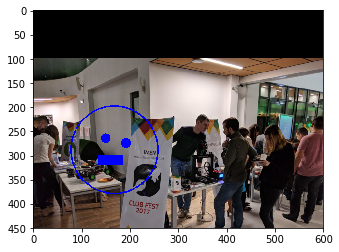

In [30]:
# finally, let's use our helper function in imutils to shift the image down
# 100 pixels
shifted = # TODO: translate using imutils
plt.imshow(shifted);

# 10. Arithmetic #

In [31]:
# images are NumPy arrays, stored as unsigned 8 bit integers -- this
# that the values of our pixels will be in the range [0, 255]; when
# using functions like cv2.add and cv2.subtract, values will be clipped
# to this range, even if the added or subtracted values fall outside the
# range of [0, 255]. Check out an example:
print("max of 255: {}".format(str(cv2.add(np.uint8([200]), np.uint8([100])))))
print("min of 0: {}".format(str(cv2.subtract(np.uint8([50]), np.uint8([100])))))
print(np.uint8([150]))

max of 255: [[255]]
min of 0: [[0]]
[150]


In [32]:
# NOTE: if you use NumPy arithmetic operations on these arrays, the value
# will be modulos (wrap around) instead of being  clipped to the [0, 255]
# range. This is important to keep in mind when working with images.
print("wrap around: {}".format(str(np.uint8([200]) + np.uint8([100]))))
print("wrap around: {}".format(str(np.uint8([50]) - np.uint8([100]))))

wrap around: [44]
wrap around: [206]


## Now let's test add and substract functions on our images ##

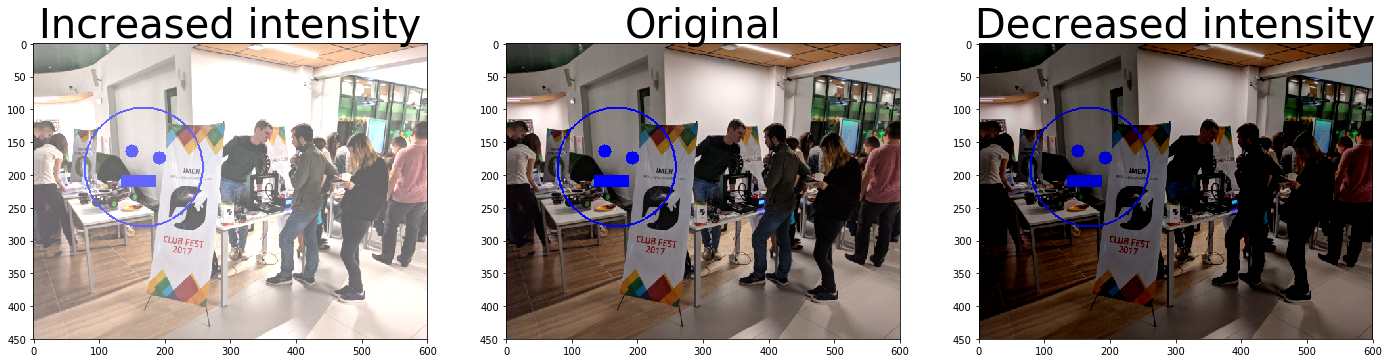

In [33]:
f, plts = plt.subplots(1, 3, figsize=(24, 10))
plts[1].imshow(image), plts[1].set_title("Original", fontsize=40);

# let's increase the intensity of all pixels in our image by 100 -- we
# accomplish this by constructing a NumPy array that is the same size of
# our matrix (filled with ones) and the multiplying it by 100 to create an
# array filled with 100's, then we simply add the images together; notice
# how the image is "brighter"
M = np.ones(image.shape, dtype = "uint8") * 100
added = # TODO: add the matrix to the image
plts[0].imshow(added), plts[0].set_title("Increased intensity", fontsize=40);

# similarly, we can subtract 50 from all pixels in our image and make it
# darker
M = np.ones(image.shape, dtype = "uint8") * 50
subtracted = # TODO: subtract the matrix from the image
plts[2].imshow(subtracted), plts[2].set_title("Decreased intensity", fontsize=40);

# 11. Bitwise AND, OR, XOR, NOT #

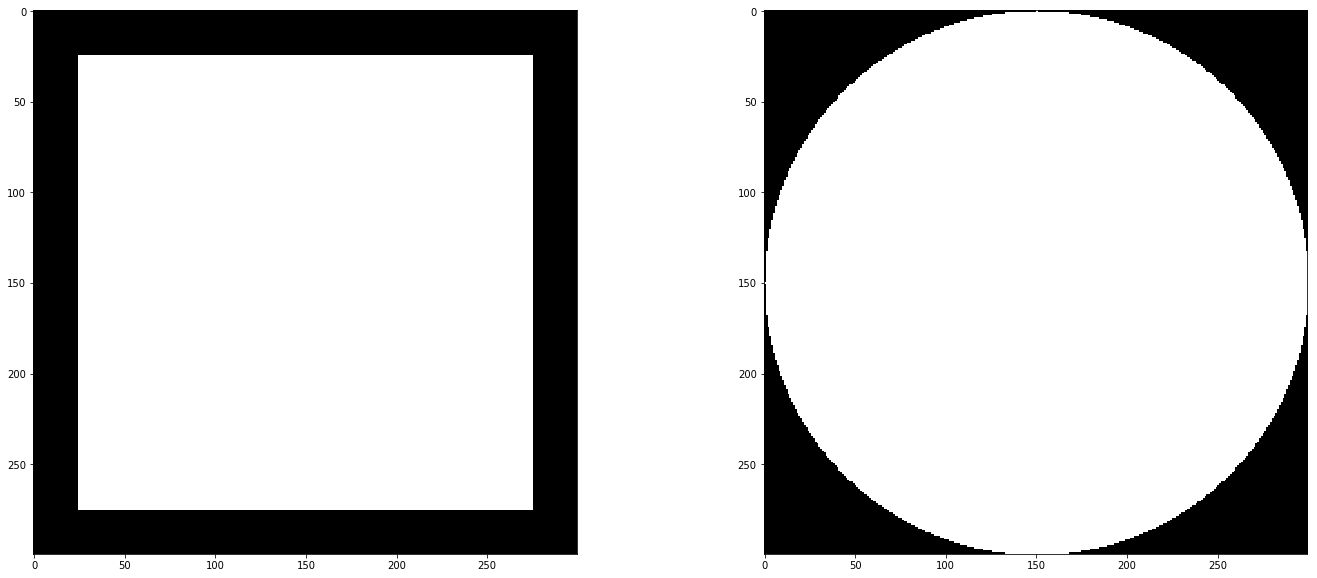

In [34]:
f, plts = plt.subplots(1, 2, figsize=(24, 10))

# first, let's draw a rectangle
rectangle = np.zeros((300, 300), dtype = "uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)
plts[0].imshow(rectangle, cmap='gray');

# secondly, let's draw a circle
circle = np.zeros((300, 300), dtype = "uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)
plts[1].imshow(circle, cmap='gray');

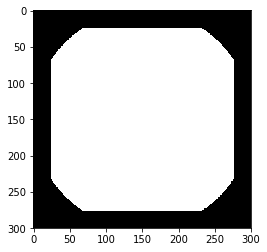

In [35]:
# A bitwise 'AND' is only True when both rectangle and circle have
# a value that is 'ON'. Simply put, the bitwise_and function
# examines every pixel in rectangle and circle. If both pixels
# have a value greater than zero, that pixel is turned 'ON' (i.e
# set to 255 in the output image). If both pixels are not greater
# than zero, then the output pixel is left 'OFF' with a value of 0.
bitwiseAnd = # TODO: Use bitwise AND
plt.imshow(bitwiseAnd, cmap='gray');

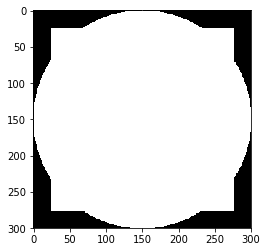

In [36]:
# A bitwise 'OR' examines every pixel in rectangle and circle. If
# EITHER pixel in rectangle or circle is greater than zero, then
# the output pixel has a value of 255, otherwise it is 0.
bitwiseOr = # TODO: Use bitwise OR
plt.imshow(bitwiseOr, cmap='gray');

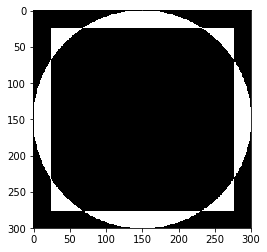

In [37]:
# The bitwise 'XOR' is identical to the 'OR' function, with one
# exception: both rectangle and circle are not allowed to BOTH
# have values greater than 0.
bitwiseXor = # TODO: Use bitwise XOR
plt.imshow(bitwiseXor, cmap='gray');

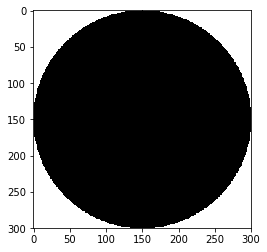

In [38]:
# Finally, the bitwise 'NOT' inverts the values of the pixels. Pixels
# with a value of 255 become 0, and pixels with a value of 0 become
# 255.
bitwiseNot = # TODO: Use bitwise NOT
plt.imshow(bitwiseNot, cmap='gray');

In [42]:
cv2.destroyAllWindows()